## Imports and Data Preprocessing

Import data and do basics of removing extraneous data

In [1]:
# Initial imports
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.utils import np_utils
%matplotlib inline

In [2]:
# Import Verlander dataset 

verlander_df = pd.read_csv(Path("../resources/verlander_update.csv"))

display(verlander_df.head())

,pitch_type,game_date,player_name,batter,pitcher,events,description,zone,des,stand,...,on_1b,outs_when_up,inning,at_bat_number,pitch_number,pitch_name,bat_score,fld_score,if_fielding_alignment,of_fielding_alignment
0,SL,9/16/2022,"Verlander, Justin",669127,434378,strikeout,swinging_strike,9,Shea Langeliers strikes out swinging.,R,...,NaN,2,5,35,5,Slider,0,2,Infield shift,Standard
1,FF,9/16/2022,"Verlander, Justin",669127,434378,NaN,foul,3,Shea Langeliers strikes out swinging.,R,...,NaN,2,5,35,4,4-Seam Fastball,0,2,Infield shift,Standard
2,SL,9/16/2022,"Verlander, Justin",669127,434378,NaN,called_strike,13,Shea Langeliers strikes out swinging.,R,...,NaN,2,5,35,3,Slider,0,2,Infield shift,Standard
3,FF,9/16/2022,"Verlander, Justin",669127,434378,NaN,foul,1,Shea Langeliers strikes out swinging.,R,...,NaN,2,5,35,2,4-Seam Fastball,0,2,Infield shift,Standard
4,SL,9/16/2022,"Verlander, Justin",669127,434378,NaN,ball,8,Shea Langeliers strikes out swinging.,R,...,NaN,2,5,35,1,Slider,0,2,Infield shift,Standard


In [3]:
# Clean dataset 

verlander_df = verlander_df.drop(columns=['des',
'at_bat_number', 
'inning', 
'zone', 
'player_name', 
'batter', 
'pitcher', 
'events',
'bb_type',
'hit_location',
'home_team',
'away_team'])

display(verlander_df.head())

,pitch_type,game_date,description,stand,p_throws,type,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,pitch_number,pitch_name,bat_score,fld_score,if_fielding_alignment,of_fielding_alignment
0,SL,9/16/2022,swinging_strike,R,R,S,1,2,NaN,NaN,NaN,2,5,Slider,0,2,Infield shift,Standard
1,FF,9/16/2022,foul,R,R,S,1,2,NaN,NaN,NaN,2,4,4-Seam Fastball,0,2,Infield shift,Standard
2,SL,9/16/2022,called_strike,R,R,S,1,1,NaN,NaN,NaN,2,3,Slider,0,2,Infield shift,Standard
3,FF,9/16/2022,foul,R,R,S,1,0,NaN,NaN,NaN,2,2,4-Seam Fastball,0,2,Infield shift,Standard
4,SL,9/16/2022,ball,R,R,B,0,0,NaN,NaN,NaN,2,1,Slider,0,2,Infield shift,Standard


In [4]:
# Encode 1st, 2nd and 3rd bases with 1s and 0s

# Fill NaN to 0 
verlander_df['on_3b'] = verlander_df['on_3b'].fillna(0)
verlander_df['on_2b'] = verlander_df['on_2b'].fillna(0)
verlander_df['on_1b'] = verlander_df['on_1b'].fillna(0)

# Change batter IDs to 1 
verlander_df['on_3b'][verlander_df['on_3b'] > 0.0] = 1.0
verlander_df['on_2b'][verlander_df['on_2b'] > 0.0] = 1.0
verlander_df['on_1b'][verlander_df['on_1b'] > 0.0] = 1.0

display(verlander_df.head())

/var/folders/zx/3xfmqcd54f3fdz2hfpnll0_80000gn/T/ipykernel_2680/1558983953.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verlander_df['on_3b'][verlander_df['on_3b'] > 0.0] = 1.0
/var/folders/zx/3xfmqcd54f3fdz2hfpnll0_80000gn/T/ipykernel_2680/1558983953.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verlander_df['on_2b'][verlander_df['on_2b'] > 0.0] = 1.0
/var/folders/zx/3xfmqcd54f3fdz2hfpnll0_80000gn/T/ipykernel_2680/1558983953.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

,pitch_type,game_date,description,stand,p_throws,type,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,pitch_number,pitch_name,bat_score,fld_score,if_fielding_alignment,of_fielding_alignment
0,SL,9/16/2022,swinging_strike,R,R,S,1,2,0.0,0.0,0.0,2,5,Slider,0,2,Infield shift,Standard
1,FF,9/16/2022,foul,R,R,S,1,2,0.0,0.0,0.0,2,4,4-Seam Fastball,0,2,Infield shift,Standard
2,SL,9/16/2022,called_strike,R,R,S,1,1,0.0,0.0,0.0,2,3,Slider,0,2,Infield shift,Standard
3,FF,9/16/2022,foul,R,R,S,1,0,0.0,0.0,0.0,2,2,4-Seam Fastball,0,2,Infield shift,Standard
4,SL,9/16/2022,ball,R,R,B,0,0,0.0,0.0,0.0,2,1,Slider,0,2,Infield shift,Standard


In [5]:
# Fill NaN in description column

verlander_df['description'] = verlander_df['description'].fillna('nothing')

## Feature Engineering

In [6]:
# Shift pitches so that model does not know the upcoming pitch 

verlander_df['pitch_name'] = verlander_df['pitch_name'].shift(-1).dropna()
verlander_df['type'] = verlander_df['type'].shift(-1).dropna()

display(verlander_df)

,pitch_type,game_date,description,stand,p_throws,type,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,pitch_number,pitch_name,bat_score,fld_score,if_fielding_alignment,of_fielding_alignment
0,SL,9/16/2022,swinging_strike,R,R,S,1,2,0.0,0.0,0.0,2,5,4-Seam Fastball,0,2,Infield shift,Standard
1,FF,9/16/2022,foul,R,R,S,1,2,0.0,0.0,0.0,2,4,Slider,0,2,Infield shift,Standard
2,SL,9/16/2022,called_strike,R,R,S,1,1,0.0,0.0,0.0,2,3,4-Seam Fastball,0,2,Infield shift,Standard
3,FF,9/16/2022,foul,R,R,B,1,0,0.0,0.0,0.0,2,2,Slider,0,2,Infield shift,Standard
4,SL,9/16/2022,ball,R,R,X,0,0,0.0,0.0,0.0,2,1,Slider,0,2,Infield shift,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,FF,4/9/2022,swinging_strike,L,R,S,2,2,0.0,0.0,0.0,0,5,4-Seam Fastball,0,0,Infield shift,Standard
2332,FF,4/9/2022,foul_tip,L,R,B,2,1,0.0,0.0,0.0,0,4,4-Seam Fastball,0,0,Infield shift,Standard
2333,FF,4/9/2022,ball,L,R,S,1,1,0.0,0.0,0.0,0,3,4-Seam Fastball,0,0,Infield shift,Standard
2334,FF,4/9/2022,called_strike,L,R,B,1,0,0.0,0.0,0.0,0,2,4-Seam Fastball,0,0,Infield shift,Standard


In [7]:
# Converting batting score and fielding score to one column.
# Positive number means fielding team is winning and negative number means batting team is winning. 
verlander_df['score_diff'] = verlander_df['fld_score'] - verlander_df['bat_score']


# Drop batting score and fielding score columns now that you have the score differential
verlander_df.drop(columns = ['bat_score', 'fld_score'], inplace=True)

In [8]:
# Feature engineering to count the number of pitches JV has thrown each outing

verlander_df['ones'] = 1
pitch_count_df = verlander_df[['game_date', 'ones']]
pitch_count_df['pitch_count'] = pitch_count_df.groupby(['game_date']).cumcount(ascending = False)
pitch_count_df['pitch_count'] = pitch_count_df['pitch_count'] + 1

verlander_df = pd.concat([verlander_df, pitch_count_df['pitch_count']], join='inner', axis=1)



/var/folders/zx/3xfmqcd54f3fdz2hfpnll0_80000gn/T/ipykernel_2680/40428878.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitch_count_df['pitch_count'] = pitch_count_df.groupby(['game_date']).cumcount(ascending = False)
/var/folders/zx/3xfmqcd54f3fdz2hfpnll0_80000gn/T/ipykernel_2680/40428878.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitch_count_df['pitch_count'] = pitch_count_df['pitch_count'] + 1


In [9]:
# Feature engineering to change the ball and strike count into one column as a string

verlander_df['count'] = verlander_df['balls'].astype(str) +'-'+ verlander_df['strikes'].astype(str)
verlander_df.drop(columns=['balls', 'strikes'], inplace=True)
verlander_df.head()

,pitch_type,game_date,description,stand,p_throws,type,on_3b,on_2b,on_1b,outs_when_up,pitch_number,pitch_name,if_fielding_alignment,of_fielding_alignment,score_diff,ones,pitch_count,count
0,SL,9/16/2022,swinging_strike,R,R,S,0.0,0.0,0.0,2,5,4-Seam Fastball,Infield shift,Standard,2,1,79,1-2
1,FF,9/16/2022,foul,R,R,S,0.0,0.0,0.0,2,4,Slider,Infield shift,Standard,2,1,78,1-2
2,SL,9/16/2022,called_strike,R,R,S,0.0,0.0,0.0,2,3,4-Seam Fastball,Infield shift,Standard,2,1,77,1-1
3,FF,9/16/2022,foul,R,R,B,0.0,0.0,0.0,2,2,Slider,Infield shift,Standard,2,1,76,1-0
4,SL,9/16/2022,ball,R,R,X,0.0,0.0,0.0,2,1,Slider,Infield shift,Standard,2,1,75,0-0


## Data Processing 

Prepare data to be fed into model

In [10]:
# Split into X and y 

X = verlander_df.drop(columns=['pitch_type', 'game_date'])
y= verlander_df['pitch_type']

display(y.value_counts)

<bound method IndexOpsMixin.value_counts of 0       SL
1       FF
2       SL
3       FF
4       SL
        ..
2331    FF
2332    FF
2333    FF
2334    FF
2335    FF
Name: pitch_type, Length: 2336, dtype: object>

In [11]:
# Use get_dummies to encode categorical variables 

X = pd.get_dummies(X)

encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)

display(X.head())
display(dummy_y)

display(X.columns)

# SL = index 3
# CH = index 0
# FF = index 2
# CU = index 1

,on_3b,on_2b,on_1b,outs_when_up,pitch_number,score_diff,ones,pitch_count,description_ball,description_blocked_ball,...,count_0-2,count_1-0,count_1-1,count_1-2,count_2-0,count_2-1,count_2-2,count_3-0,count_3-1,count_3-2
0,0.0,0.0,0.0,2,5,2,1,79,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.0,0.0,0.0,2,4,2,1,78,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.0,0.0,0.0,2,3,2,1,77,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.0,0.0,0.0,2,2,2,1,76,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,2,1,2,1,75,1,0,...,0,0,0,0,0,0,0,0,0,0


array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

Index(['on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'pitch_number', 'score_diff',
       'ones', 'pitch_count', 'description_ball', 'description_blocked_ball',
       'description_called_strike', 'description_foul',
       'description_foul_bunt', 'description_foul_tip',
       'description_hit_by_pitch', 'description_hit_into_play',
       'description_swinging_strike', 'description_swinging_strike_blocked',
       'stand_L', 'stand_R', 'p_throws_R', 'type_B', 'type_S', 'type_X',
       'pitch_name_4-Seam Fastball', 'pitch_name_Changeup',
       'pitch_name_Curveball', 'pitch_name_Slider',
       'if_fielding_alignment_Infield shift', 'if_fielding_alignment_Standard',
       'if_fielding_alignment_Strategic', 'of_fielding_alignment_Standard',
       'of_fielding_alignment_Strategic', 'count_0-0', 'count_0-1',
       'count_0-2', 'count_1-0', 'count_1-1', 'count_1-2', 'count_2-0',
       'count_2-1', 'count_2-2', 'count_3-0', 'count_3-1', 'count_3-2'],
      dtype='object')

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, random_state=1)

# X_test.head()

,on_3b,on_2b,on_1b,outs_when_up,pitch_number,score_diff,ones,pitch_count,description_ball,description_blocked_ball,...,count_0-2,count_1-0,count_1-1,count_1-2,count_2-0,count_2-1,count_2-2,count_3-0,count_3-1,count_3-2
1533,0.0,1.0,1.0,2,2,-4,1,68,0,0,...,0,0,0,0,0,0,0,0,0,0
899,0.0,0.0,0.0,0,4,0,1,23,0,0,...,0,0,0,1,0,0,0,0,0,0
1271,0.0,0.0,0.0,1,1,1,1,28,0,0,...,0,0,0,0,0,0,0,0,0,0
654,0.0,0.0,0.0,0,4,2,1,62,1,0,...,1,0,0,0,0,0,0,0,0,0
194,0.0,0.0,0.0,0,5,1,1,36,1,0,...,0,0,0,0,0,0,1,0,0,0


## Deep Learning/Neural Network Architecture

Using the method from the module, the following basis is used to design the first iteration of the neural network: 

*the mean of the number of input features and the number of neurons in the output layer ((number of input features + number of neurons in output layer) / 2). Use a number close to this mean for the number of neurons in the first hidden layer. Repeat this pattern for subsequent hidden layers ((number of neurons in the prior hidden layer + number of neurons in output layer) / 2). Softmax is the activation for the output layer that is used for multi-class classification. Categorial cross entropy and predictive model accuracy are respectively the loss functions and metrics used for multi-class classification*

In [13]:
# Initialize the Deep Learning Neural Network model

nn_v0 = Sequential()

2022-09-29 17:17:04.780580: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
# Design the network architecture 

# Define the model - deep neural net
number_input_features = len(X.columns)
number_output = 4

# Define hidden layers
i = 0
hidden_nodes_layer=(number_input_features+number_output)/2
while hidden_nodes_layer/2 > 4:
    if i == 0:
        nn_v0.add(Dense(units=round(hidden_nodes_layer), input_dim=number_input_features, activation='relu'))
        i+=1
    else:
        hidden_nodes_layer = (hidden_nodes_layer+number_output)/2
        nn_v0.add(Dense(units=round(hidden_nodes_layer), activation='relu'))
        i+=1

# Define output layer
nn_v0.add(Dense(units=number_output, activation='softmax'))

# Compile the model
nn_v0.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

display(nn_v0.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                1104      
                                                                 
 dense_1 (Dense)             (None, 14)                350       
                                                                 
 dense_2 (Dense)             (None, 9)                 135       
                                                                 
 dense_3 (Dense)             (None, 7)                 70        
                                                                 
 dense_4 (Dense)             (None, 4)                 32        
                                                                 
Total params: 1,691
Trainable params: 1,691
Non-trainable params: 0
_________________________________________________________________


None

In [15]:
# Fit the data to the model

model_v0 = nn_v0.fit(X_train, y_train, epochs=100)

Epoch 1/100
55/55 [==============================] - 1s 982us/step - loss: 1.5411 - accuracy: 0.2215
Epoch 2/100
55/55 [==============================] - 0s 1ms/step - loss: 1.3537 - accuracy: 0.4743
Epoch 3/100
55/55 [==============================] - 0s 1ms/step - loss: 1.3300 - accuracy: 0.5000
Epoch 4/100
55/55 [==============================] - 0s 1ms/step - loss: 1.3093 - accuracy: 0.5063
Epoch 5/100
55/55 [==============================] - 0s 1ms/step - loss: 1.2902 - accuracy: 0.5057
Epoch 6/100
55/55 [==============================] - 0s 845us/step - loss: 1.2692 - accuracy: 0.5068
Epoch 7/100
55/55 [==============================] - 0s 1ms/step - loss: 1.2271 - accuracy: 0.5068
Epoch 8/100
55/55 [==============================] - 0s 1ms/step - loss: 1.1895 - accuracy: 0.5068
Epoch 9/100
55/55 [==============================] - 0s 1ms/step - loss: 1.1630 - accuracy: 0.5068
Epoch 10/100
55/55 [==============================] - 0s 927us/step - loss: 1.1267 - accuracy: 0.5068
Epo

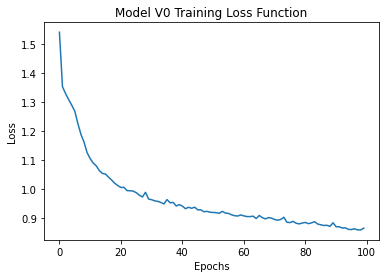

In [16]:
# Plot the loss over epochs

plt.plot(model_v0.history["loss"])
plt.title("Model V0 Training Loss Function")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

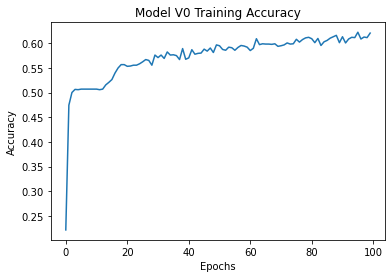

In [17]:
# Plot the accuracy over epochs

plt.plot(model_v0.history["accuracy"])
plt.title("Model V0 Training Accuracy")
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.show()

In [18]:
# Evaluate model on test set

model_loss, model_accuracy = nn_v0.evaluate(
    X_test, y_test, verbose=2
)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

19/19 - 0s - loss: 1.2036 - accuracy: 0.5120 - 176ms/epoch - 9ms/step
Loss: 1.2036411762237549, Accuracy: 0.5119863152503967


157/157 [==============================] - 0s 731us/step
Intercept -0.0109883518174686
Prediction_local [0.17025889]
Right: 0.18169804


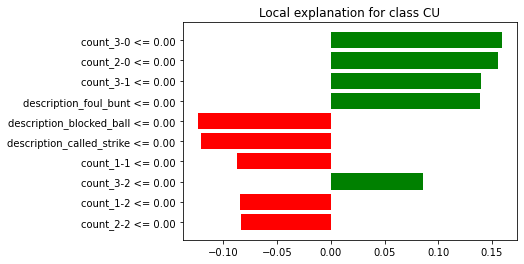

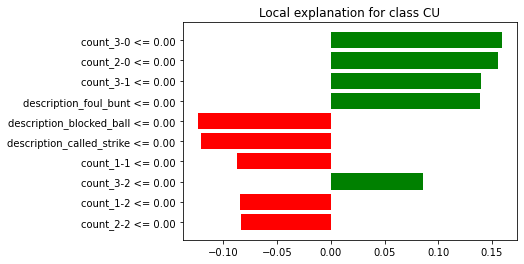

In [63]:
# Use Lime library to help visualize important features 

from lime import lime_tabular

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data = np.array(X_train), 
    feature_names = list(X_train.columns),
    class_names=['CH', 'CU', 'FF', 'SL'],
    mode='classification',
    verbose = True, 
    random_state=1
)

lime_exp = lime_explainer.explain_instance(
    data_row = X_test.iloc[0, :],
    predict_fn = nn_v0.predict,
    num_features=10 
)

lime_exp.as_pyplot_figure()
# display(pd.DataFrame(lime_exp.as_list()))


In [ ]:
# # Have the neural network cast its prediction on what pitch is next

y_pred = nn_v0.predict(X_test)
pred_final = np.argmax(y_pred, axis=1)

# Translate target of test set into pitch type

y_test_reverted = []
for lists in y_test:
    if lists[0] == 1:
        y_test_reverted.append('CH')
    elif lists[1] == 1:
        y_test_reverted.append('CU')
    elif lists[2] == 1:
        y_test_reverted.append('FF')
    else:
        y_test_reverted.append('SL')

# Translate results into pitch type

y_pred_converted = []
for numbers in pred_final:
    if numbers == 0:
        y_pred_converted.append('CH')
    elif numbers == 1:
        y_pred_converted.append('CU')
    elif numbers == 2:
        y_pred_converted.append('FF')
    else: 
        y_pred_converted.append('SL')

# Place results in dataframe

final_results = pd.DataFrame({
    'Predictions': y_pred_converted,
    'Actual':  y_test_reverted})

display(final_results.head())
print(classification_report(final_results['Actual'], final_results['Predictions']))


## Optimize the Model

### Optimized Model 1
Optimize the model by increasing the number of epochs 

In [ ]:
#Define the new, optimized model

nn_v1 = Sequential()

In [ ]:
# Design the network architecture 

# Define the model - deep neural net
number_input_features = len(X.columns)
number_output = 4

# Define hidden layers
i = 0
hidden_nodes_layer=(number_input_features+number_output)/2
while hidden_nodes_layer/2 > 4: 
    if i == 0:
        nn_v1.add(Dense(units=round(hidden_nodes_layer), input_dim=number_input_features, activation='relu'))
        i+=1
    else:
        hidden_nodes_layer = (hidden_nodes_layer+number_output)/2
        nn_v1.add(Dense(units=round(hidden_nodes_layer), activation='relu'))
        i+=1

# Define output layer
nn_v1.add(Dense(units=number_output, activation='softmax'))

# Compile the model
nn_v1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(len(X.columns))
display(nn_v1.summary())

In [ ]:
# Fit the data to the model

model_v1 = nn_v1.fit(X_train, y_train, epochs=500)

In [ ]:
# Plot the loss over epochs

plt.plot(model_v1.history["loss"])
plt.title("Model V1 Training Loss Function")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Plot the accuracy over epochs

plt.plot(model_v1.history["accuracy"])
plt.title("Model V1 Training Accuracy Function")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Evaluate model on test set

model_loss, model_accuracy = nn_v1.evaluate(
    X_test, y_test, verbose=2
)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Have the neural network cast its prediction on what pitch is next

y_pred = nn_v1.predict(X_test)
pred_final = np.argmax(y_pred, axis=1)

# Translate results into pitch type

y_pred_converted = []
for numbers in pred_final:
    if numbers == 0:
        y_pred_converted.append('CH')
    elif numbers == 1:
        y_pred_converted.append('CU')
    elif numbers == 2:
        y_pred_converted.append('FF')
    else: 
        y_pred_converted.append('SL')

# Place results into dataframe

final_results_v1 = pd.DataFrame({
    'Predictions': y_pred_converted,
    'Actual':  y_test_reverted})

display(final_results_v1.head())
print(classification_report(final_results_v1['Actual'], final_results_v1['Predictions']))

### Optimized Model 2

From Keras, use the stochastic gradient descent (SGD) optimizer that is an iterative method for optimizing an objective function with suitable smoothness properties

In [ ]:
# Define the model

nn_v2 = Sequential()

In [ ]:
# Design the network architecture 

import tensorflow as tf

tf.keras.optimizers.Adadelta()
#from keras.optimizers import Adadelta
# Define the model - deep neural net

total_neurons = len(X.columns)*(2/3)
number_input_features = len(X.columns)
number_output = 4

# Define hidden layers
i = 0
hidden_nodes_layer=(number_input_features+number_output)/2
while hidden_nodes_layer/2 > 4: 
    if i == 0:
        nn_v2.add(Dense(units=round(hidden_nodes_layer), input_dim=number_input_features, activation='relu'))
        i+=1
    else:
        hidden_nodes_layer = (hidden_nodes_layer+number_output)/2
        nn_v2.add(Dense(units=round(hidden_nodes_layer), activation='relu'))
        i+=1

# Define output layer
nn_v2.add(Dense(units=number_output, activation='softmax'))

# Compile the model
nn_v2.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

display(nn_v2.summary())

In [ ]:
# Fit the data to the model

model_v2 = nn_v2.fit(X_train, y_train, epochs=100)

In [ ]:
# Plot the loss over epochs

plt.plot(model_v2.history["loss"])
plt.title("Model V2 Training Loss Function")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Plot the accuracy over epochs

plt.plot(model_v2.history["accuracy"])
plt.title("Model V2 Training Accuracy Function")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Evaluate model on test set

model_loss, model_accuracy = nn_v2.evaluate(
    X_test, y_test, verbose=2
)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Have the neural network cast its prediction on what pitch is next

y_pred = nn_v2.predict(X_test)
pred_final = np.argmax(y_pred, axis=1)

# Translate results into pitch type

y_pred_converted = []
for numbers in pred_final:
    if numbers == 0:
        y_pred_converted.append('CH')
    elif numbers == 1:
        y_pred_converted.append('CU')
    elif numbers == 2:
        y_pred_converted.append('FF')
    else: 
        y_pred_converted.append('SL')

# Put results into dataframe

final_results_v2 = pd.DataFrame({
    'Predictions': y_pred_converted,
    'Actual':  y_test_reverted})

display(final_results_v2.head())
print(classification_report(final_results_v2['Actual'], final_results_v2['Predictions']))

### Optimized Model 3

From Keras, use the stochastic gradient descent (SGD) optimizer that is an iterative method for optimizing an objective function with suitable smoothness properties

In [ ]:
# Define the model

nn_v3 = Sequential()

In [ ]:
# Design the network architecture 

from keras.optimizers import SGD
# Define the model - deep neural net

number_input_features = len(X.columns)
number_output = 4

# Define hidden layers
i = 0
hidden_nodes_layer=(number_input_features+number_output)/2
while hidden_nodes_layer/2 > 4: 
    if i == 0:
        nn_v3.add(Dense(units=round(hidden_nodes_layer), input_dim=number_input_features, activation='relu'))
        i+=1
    else:
        hidden_nodes_layer = (hidden_nodes_layer+number_output)/2
        nn_v3.add(Dense(units=round(hidden_nodes_layer), activation='relu'))
        i+=1

# Define output layer
nn_v3.add(Dense(units=number_output, activation='softmax'))

# Compile the model
nn_v3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

display(nn_v3.summary())

In [ ]:
# Fit the data to the model

model_v3 = nn_v3.fit(X_train, y_train, epochs=100)

In [ ]:
# Plot the loss over epochs

plt.plot(model_v3.history["loss"])
plt.title("Model V3 Training Loss Function")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Plot the accuracy over epochs

plt.plot(model_v3.history["accuracy"])
plt.title("Model V3 Training Accuracy Function")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Evaluate model on test set

model_loss, model_accuracy = nn_v3.evaluate(
    X_test, y_test, verbose=2
)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Have the neural network cast its prediction on what pitch is next

y_pred = nn_v3.predict(X_test)
pred_final = np.argmax(y_pred, axis=1)

# Translate results into pitch type

y_pred_converted = []
for numbers in pred_final:
    if numbers == 0:
        y_pred_converted.append('CH')
    elif numbers == 1:
        y_pred_converted.append('CU')
    elif numbers == 2:
        y_pred_converted.append('FF')
    else: 
        y_pred_converted.append('SL')

# Create into dataframe
final_results_v3 = pd.DataFrame({
    'Predictions': y_pred_converted,
    'Actual':  y_test_reverted})

display(final_results_v3.head())
print(classification_report(final_results_v3['Actual'], final_results_v3['Predictions']))

## Field Testing

Justin Verlander pitched against the Arizona Diamondbacks on the evening of September 28, 2022 at home. The data from that game was extracted from Baseball Savant and used to test the 4 models above

In [ ]:
field_df = pd.read_csv(Path("../resources/field_test_data.csv"))

field_df = field_df.loc[:,        ['pitch_type',
                                 'pitch_name',
                                   'game_date',
                                   'description',
                                #    'zone',
                                   'stand',
                                   'p_throws',
                                   'type',
                                   'balls',
                                   'strikes',
                                   'on_3b',
                                   'on_2b',
                                   'on_1b',
                                   'outs_when_up',
                                   'pitch_number',
                                   'bat_score',
                                   'fld_score',
                                   'if_fielding_alignment',
                                   'of_fielding_alignment'
                                  ]]

display(verlander_df.columns)

## Feature Engineering

In [ ]:
# Shift pitches so that model does not know the upcoming pitch 

field_df['pitch_name'] = field_df['pitch_name'].shift(-1).dropna()
field_df['type'] = field_df['type'].shift(-1).dropna()

display(field_df)

In [ ]:
# Converting batting score and fielding score to one column.
# Positive number means fielding team is winning and negative number means batting team is winning. 
field_df['score_diff'] = field_df['fld_score'] - field_df['bat_score']


# Drop batting score and fielding score columns now that you have the score differential
field_df.drop(columns = ['bat_score', 'fld_score'], inplace=True)

In [ ]:
# Feature engineering to count the number of pitches JV has thrown each outing

field_df['ones'] = 1
pitch_count_df = field_df[['game_date', 'ones']]
pitch_count_df['pitch_count'] = pitch_count_df.groupby(['game_date']).cumcount(ascending = False)
pitch_count_df['pitch_count'] = pitch_count_df['pitch_count'] + 1

field_df = pd.concat([field_df, pitch_count_df['pitch_count']], join='inner', axis=1)

In [ ]:
# Feature engineering to change the ball and strike count into one column as a string

field_df['count'] = field_df['balls'].astype(str) +'-'+ field_df['strikes'].astype(str)
field_df.drop(columns=['balls', 'strikes'], inplace=True)
field_df.head()

In [ ]:
# Encode 1st, 2nd and 3rd bases with 1s and 0s

# Fill NaN to 0 
field_df['on_3b'] = field_df['on_3b'].fillna(0)
field_df['on_2b'] = field_df['on_2b'].fillna(0)
field_df['on_1b'] = field_df['on_1b'].fillna(0)

# Change batter IDs to 1 
field_df['on_3b'][field_df['on_3b'] > 0.0] = 1.0
field_df['on_2b'][field_df['on_2b'] > 0.0] = 1.0
field_df['on_1b'][field_df['on_1b'] > 0.0] = 1.0

display(field_df.head())

In [ ]:
# Split into X and y 

X_real_testing = field_df.drop(columns=['pitch_type', 'game_date'])
y_real_testing = field_df['pitch_type']


In [ ]:
# Use get_dummies to encode categorical variables 

X_real_testing = pd.get_dummies(X_real_testing)

encoder = LabelEncoder()
encoder.fit(y_real_testing)
encoded_y_real = encoder.transform(y_real_testing)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_real = np_utils.to_categorical(encoded_y_real)

# if a parameter is not present in the game data, put in a column of 0s
parameters_list = {
    'stand_L',
    'stand_R',
    'if_fielding_alignment_Infield shift',
    'if_fielding_alignment_Standard',
    'if_fielding_alignment_Strategic',
    'of_fielding_alignment_Standard',
    'of_fielding_alignment_Strategic',
    'description_foul_bunt',
    'description_blocked_ball'
}
for string in parameters_list:
    if string not in X_real_testing:
        X_real_testing[string] = 0

display(X_real_testing.columns)

In [ ]:
# Evaluate model 1 on test set

model_loss, model_accuracy = nn_v0.evaluate(
    X_real_testing, dummy_y_real, verbose=2
)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Evaluate model 2 on test set

model_loss, model_accuracy = nn_v1.evaluate(
    X_real_testing, dummy_y_real, verbose=2
)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Evaluate model 3 on test set

model_loss, model_accuracy = nn_v2.evaluate(
    X_real_testing, dummy_y_real, verbose=2
)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Evaluate model 4 on test set

model_loss, model_accuracy = nn_v3.evaluate(
    X_real_testing, dummy_y_real, verbose=2
)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# # Have the neural network cast its prediction on what pitch is next

y_pred_v0 = nn_v0.predict(X_real_testing)
y_pred_v1 = nn_v1.predict(X_real_testing)
y_pred_v2 = nn_v2.predict(X_real_testing)
y_pred_v3 = nn_v3.predict(X_real_testing)

pred_final_v0 = np.argmax(y_pred_v0, axis=1)
pred_final_v1 = np.argmax(y_pred_v1, axis=1)
pred_final_v2 = np.argmax(y_pred_v2, axis=1)
pred_final_v3 = np.argmax(y_pred_v3, axis=1)

# Translate target of test set into pitch type

y_test_reverted = []
for lists in y_test:
    if lists[0] == 1:
        y_test_reverted.append('CH')
    elif lists[1] == 1:
        y_test_reverted.append('CU')
    elif lists[2] == 1:
        y_test_reverted.append('FF')
    else:
        y_test_reverted.append('SL')

# Place results in dataframe

final_results_real = pd.DataFrame()

# Translate results into pitch type

for arrays in [pred_final_v0, pred_final_v1, pred_final_v2, pred_final_v3]:
    y_pred_converted = []
    for numbers in arrays:
        if numbers == 0:
            y_pred_converted.append('CH')
        elif numbers == 1:
            y_pred_converted.append('CU')
        elif numbers == 2:
            y_pred_converted.append('FF')
        else: 
            y_pred_converted.append('SL')
    y_pred_series = pd.DataFrame(y_pred_converted)
    final_results_real = pd.concat([final_results_real, y_pred_series], axis=1)

final_results_real = pd.concat([final_results_real, y_real_testing], axis=1)
final_results_real.columns = ['Model 1 (v0) Pred', 'Model 2 (v1) Pred', 'Model 3 (v2) Pred', 'Model 4 (v3) Pred', 'Actual']

display(final_results_real)
print(classification_report(final_results_real['Actual'], final_results_real['Model 1 (v0) Pred']))
print(classification_report(final_results_real['Actual'], final_results_real['Model 2 (v1) Pred']))
print(classification_report(final_results_real['Actual'], final_results_real['Model 3 (v2) Pred']))
print(classification_report(final_results_real['Actual'], final_results_real['Model 4 (v3) Pred']))